In [6]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd 
import uproot
from datetime import datetime
from FlightTracker import FlightTracker
from pandasql import sqldf
from Flight import Flight
tracker = FlightTracker('2023-05-12 00:00:00')
tracker.flights_distinct

from IPython.display import clear_output

In [22]:
f = tracker.get_flight_by_index(0)
t = f.header_df
print(fuckingf)
sqldf('select count(*), sum(cw), sum(impulsive) from t ')

,count(*),sum(cw),sum(impulsive)
0,107,0,0


In [23]:
t = tracker.flights_distinct.reset_index(drop=True)
for i in range(len(t)):
    print(f'---------------------')
    print(f'start: {i + 1}/{len(t)}, {t.flightnumber.iloc[i]}')
    f = tracker.get_flight_by_index(i)
    flight = f.header_df.reset_index(drop=True)
    
    query = '''
    Select flightnumber, mintime, maxtime, strftime('%Y-%m-%d %H:%M:%S.%f', datetime(flight.trigger_time, 'unixepoch')) as test_time, count(*) as SumEvents, sum(cw), sum(impulsive) From t
    Left Join flight
    On strftime('%Y-%m-%d %H:%M:%S.%f', datetime(flight.trigger_time, 'unixepoch')) >= t.mintime
    And strftime('%Y-%m-%d %H:%M:%S.%f', datetime(flight.trigger_time, 'unixepoch')) <= t.maxtime
    Group By flightnumber, maxtime, mintime
    order by mintime asc
    '''
    t = sqldf(query)
    print(f'end: {i + 1}/{len(t)}')
    
    if i ==1:
        break

clear_output(wait=True)
t 

,flightnumber,mintime,maxtime,test_time,SumEvents,sum(cw),sum(impulsive)
0,THY8JK,2023-05-12 07:05:09.600000,2023-05-12 07:11:06.400000,None,1,NaN,NaN
1,THY76Y,2023-05-12 07:24:30.300000,2023-05-12 07:25:30.600000,2023-05-12 07:25:12.12.000,10,0.0,0.0
2,THY8MT,2023-05-12 11:12:41.800000,2023-05-12 11:18:43.600000,None,1,NaN,NaN
3,THY73G,2023-05-12 11:19:18.800000,2023-05-12 11:25:15.500000,None,1,NaN,NaN
4,SAS931,2023-05-12 11:19:43.900000,2023-05-12 11:25:15.500000,None,1,NaN,NaN
5,DAL143,2023-05-12 11:57:24.900000,2023-05-12 11:58:25.200000,None,1,NaN,NaN
6,OCN72,2023-05-12 12:40:07.300000,2023-05-12 12:46:14.100000,None,1,NaN,NaN
7,DLH456,2023-05-12 13:06:20.000000,2023-05-12 13:11:56.600000,None,1,NaN,NaN
8,DAL179,2023-05-12 13:17:18.200000,2023-05-12 13:23:25.000000,None,1,NaN,NaN
9,DLH490,2023-05-12 13:37:34.100000,2023-05-12 13:43:50.900000,None,1,NaN,NaN


In [7]:
t

,flightnumber,mintime,maxtime,SumEvents,sum(cw),sum(impulsive)
0,THY8JK,2023-05-12 07:05:09.600000,2023-05-12 07:11:06.400000,1,None,None


In [7]:
f1 = tracker.get_flight_by_index(6)
f1.header_df = Flight.get_what_ever_is_in_those_root_files(f1.start_time_plot, f1.stop_time_plot, filetype = 'combined.root')
test_df = f1.header_df
test_df

"2023-05-12T12:40:07" "2023-05-12T12:46:14" duration: 0:06:07 [hh:mm:ss]
OCN72   


,index,station_number,run_number,event_number,trigger_time,radiant_triggers,lt_triggers,l1_max,amp_max,SNR_max,cw,impulsive
225,0,11,2216,2207,1.683895e+09,False,True,0.043364,0.053702,6.208182,0,0
226,1,11,2216,2216,1.683895e+09,False,True,0.072039,0.047785,6.892649,0,0
227,2,11,2216,2219,1.683895e+09,False,True,0.053217,0.046632,6.961696,0,0
228,3,11,2216,2237,1.683895e+09,False,True,0.060553,0.046921,5.899406,0,0
229,4,11,2216,2241,1.683895e+09,False,True,0.032746,0.050265,6.008205,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1833,112,24,1182,214,1.683895e+09,False,True,0.093607,0.054024,6.062606,0,0
1834,113,24,1182,238,1.683896e+09,False,True,0.048785,0.050220,6.141518,0,0
1835,114,24,1182,239,1.683896e+09,False,True,0.035933,0.056424,6.064378,0,0
1836,115,24,1182,240,1.683896e+09,False,True,0.074238,0.065839,5.786492,0,0


In [26]:
query = '''
Select flightnumber, mintime, maxtime, count(*), sum(cw), sum(impulsive) From f
left join test_df
on strftime('%Y-%m-%d %H:%M:%S.%f', datetime(trigger_time, 'unixepoch')) >= f.mintime and strftime('%Y-%m-%d %H:%M:%S.%f', datetime(trigger_time, 'unixepoch')) < f.maxtime


'''

sqldf(query)

,flightnumber,mintime,maxtime,count(*),sum(cw),sum(impulsive)
0,THY8JK,2023-05-12 07:05:09.600000,2023-05-12 07:11:06.400000,137,16,14


In [5]:
f1.flights

,index,id,latitude,longitude,altitude,seen,rssi,flightnumber,hexcode,track,speed,vertrate,readtime,date,filename,x,y,z,r2,readtime_utc
310,4100,None,72.740707,-37.109878,36000.0,0.2,-29.6,OCN72,3c6565,289.0,482.0,0.0,2023-05-12 13:40:07.300000,2023-05-12,2023.05.13-051443.db,14.308714,148.973849,9.214710,22482.857808,2023-05-12 12:40:07.300000+00:00
311,4101,None,72.744808,-37.151814,36000.0,0.1,-30.0,OCN72,3c6565,289.0,483.0,0.0,2023-05-12 13:40:12.400000,2023-05-12,2023.05.13-051443.db,14.665755,144.312354,9.321236,21128.025382,2023-05-12 12:40:12.400000+00:00
312,4102,None,72.748672,-37.191639,36000.0,0.1,-26.7,OCN72,3c6565,289.0,483.0,0.0,2023-05-12 13:40:17.400000,2023-05-12,2023.05.13-051443.db,15.001724,139.885401,9.419229,19881.699099,2023-05-12 12:40:17.400000+00:00
313,4103,None,72.752442,-37.230091,36000.0,0.1,-23.4,OCN72,3c6565,289.0,483.0,0.0,2023-05-12 13:40:22.400000,2023-05-12,2023.05.13-051443.db,15.329247,135.610959,9.510901,18715.775325,2023-05-12 12:40:22.400000+00:00
314,4104,None,72.755768,-37.264332,36000.0,0.0,-22.6,OCN72,3c6565,289.0,483.0,64.0,2023-05-12 13:40:27.400000,2023-05-12,2023.05.13-051443.db,15.617843,131.804544,9.590113,17708.325183,2023-05-12 12:40:27.400000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,4168,None,72.964737,-39.570977,36000.0,0.0,-19.2,OCN72,3c6565,287.0,479.0,0.0,2023-05-12 13:45:49,2023-05-12,2023.05.13-051443.db,33.115409,-124.721899,9.666249,16745.618640,2023-05-12 12:45:49+00:00
379,4169,None,72.967700,-39.606400,36000.0,0.1,-17.5,OCN72,3c6565,287.0,479.0,64.0,2023-05-12 13:45:54,2023-05-12,2023.05.13-051443.db,33.353450,-128.661838,9.586656,17758.225126,2023-05-12 12:45:54+00:00
380,4170,None,72.970871,-39.644811,36000.0,0.1,-16.2,OCN72,3c6565,287.0,479.0,0.0,2023-05-12 13:45:59.100000,2023-05-12,2023.05.13-051443.db,33.607657,-132.934083,9.497606,18891.149576,2023-05-12 12:45:59.100000+00:00
381,4171,None,72.973752,-39.679527,36000.0,0.0,-15.5,OCN72,3c6565,287.0,479.0,0.0,2023-05-12 13:46:04.100000,2023-05-12,2023.05.13-051443.db,33.838430,-136.795339,9.414642,19946.639650,2023-05-12 12:46:04.100000+00:00


In [4]:
query = '''
Select * from test_df where cw = 1
'''
sqldf(query)


,station_number,run_number,event_number,trigger_time,radiant_triggers,lt_triggers,l1_max,amp_max,SNR_max,cw,impulsive,index
0,11,2216,2304,1.683895e+09,0,1,0.826611,0.068552,5.736834,1,0,9
1,11,2216,2331,1.683896e+09,0,1,0.907465,0.078510,5.314101,1,0,10
2,13,1310,3099,1.683895e+09,0,1,0.456290,0.051663,5.564691,1,0,28
3,13,1310,3107,1.683896e+09,0,1,0.404587,0.054862,6.624159,1,0,29
4,21,2730,775,1.683895e+09,0,1,0.675957,0.051315,5.781531,1,0,31
5,21,2730,1010,1.683895e+09,0,1,0.963961,0.152373,5.970848,1,0,56
6,21,2730,1038,1.683895e+09,0,1,0.946352,0.147391,6.071970,1,0,57
7,21,2730,1039,1.683895e+09,0,1,0.940471,0.138206,6.913222,1,0,58
8,23,1665,1002,1.683895e+09,0,1,0.448566,0.054290,5.767829,1,0,83
9,23,1665,1008,1.683895e+09,0,1,0.450028,0.058669,5.844137,1,0,84


INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:212: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:311 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Found combined file


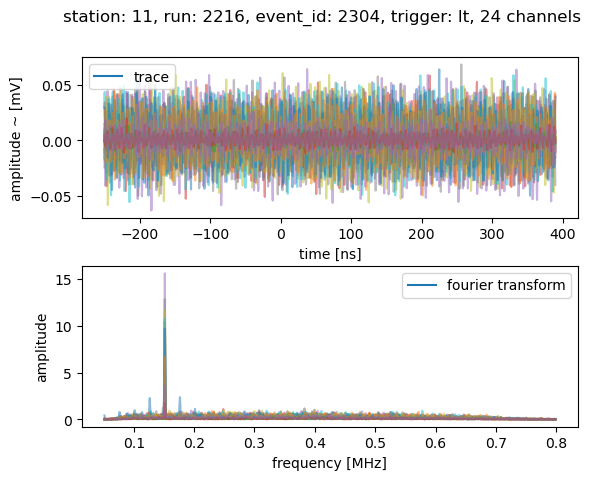

In [5]:
f1.plot_event_by_id(9)

INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:555 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Found combined file


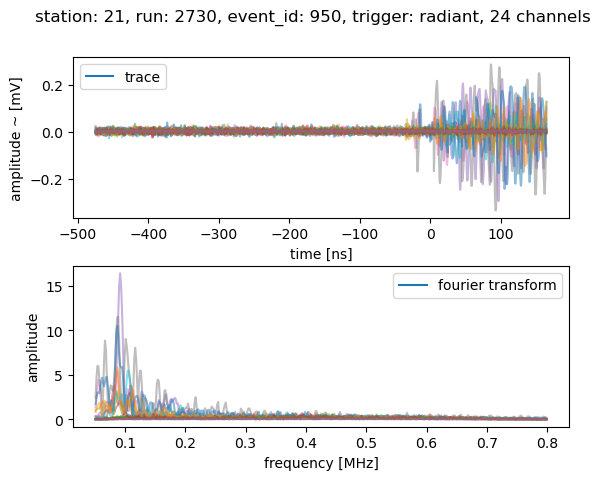

In [6]:
f1.plot_event_by_id(51)

In [7]:
query = ''' Select 
                count(*)
                ,sum(radiant_triggers)
                ,sum(lt_triggers)
                ,sum(cw)
                ,sum(impulsive)
                ,strftime('%Y-%m-%d %H:%M:%S.%f', min(trigger_time), 'unixepoch') as min_time
                ,strftime('%Y-%m-%d %H:%M:%S.%f', max(trigger_time), 'unixepoch') as max_time
            From test_df
            '''
sqldf(query)

,count(*),sum(radiant_triggers),sum(lt_triggers),sum(cw),sum(impulsive),min_time,max_time
0,117,23,81,16,14,2023-05-12 12:40:08.08.497,2023-05-12 12:45:51.51.689


In [8]:
sqldf('Select count(*), sum(radiant), sum(lt), sum(cw) FROM (Select event_number, case when l1_max > 0.5 Then 1 else 0 end as cw, case when radiant_triggers = True THEN 1 ELSE 0 END AS radiant, case when lt_triggers = True THEN 1 ELSE 0 END AS lt FROM test_df)t0')

,count(*),sum(radiant),sum(lt),sum(cw)
0,117,23,81,6


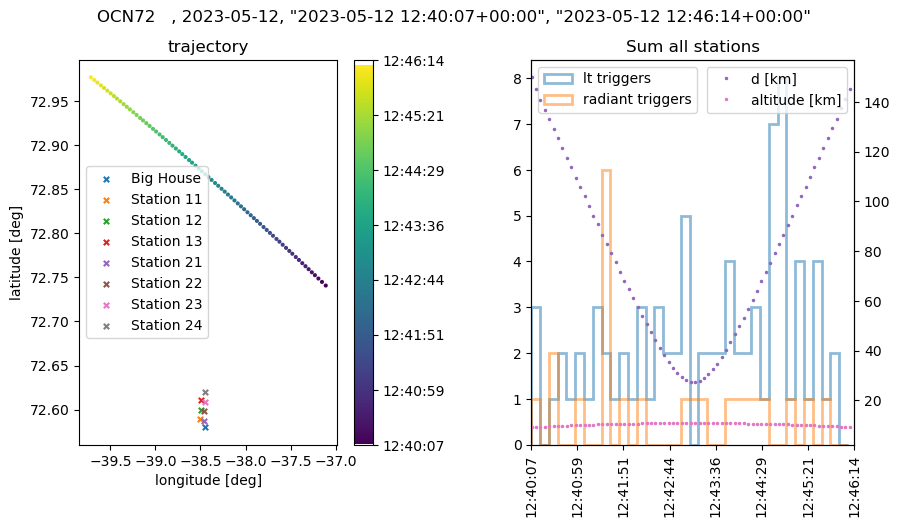

In [9]:
f1.plot_flight()


In [10]:

'''
tracker.flights_distinct = tracker.flights_distinct.query('minr2 < 30')
df = pd.DataFrame(['trigger_distances'])
for i in range(len(tracker.flights_distinct)):
    t = tracker.flights_distinct
    start_time = t.mintime.iloc[i][:19] # [:19] to throw away potential microseconds
    stop_time = t.maxtime.iloc[i][:19] # [:19] to throw away potential microseconds
    start_time = FlightTracker.utc.localize(datetime.strptime(start_time, FlightTracker.fmt))
    stop_time = FlightTracker.utc.localize(datetime.strptime(stop_time, FlightTracker.fmt))

    flightnumber = t.flightnumber.iloc[i]
    print(i, ' ', flightnumber)

    f = tracker.flights.query(f"readtime_utc >= '{datetime.strftime(start_time, FlightTracker.fmt)}' & readtime_utc <= '{datetime.strftime(stop_time, FlightTracker.fmt)}' & flightnumber == '{flightnumber}' ").copy()
    times = pd.to_datetime(f.readtime_utc, format='ISO8601').astype('int64') / 10**9
    r = np.sqrt(f.r2)

    header_df = FlightTracker.get_runtable(start_time, stop_time)

    temp_df = pd.DataFrame()
    temp_df['trigger_distances'] = FlightTracker.part_lin(header_df[(times.min() <= header_df.trigger_time) & (header_df.trigger_time <= times.max())].trigger_time, times, r)
    
    df = pd.concat([df, temp_df], ignore_index=True)



plt.hist(df.trigger_distances, bins = 50)
;
'''

'\ntracker.flights_distinct = tracker.flights_distinct.query(\'minr2 < 30\')\ndf = pd.DataFrame([\'trigger_distances\'])\nfor i in range(len(tracker.flights_distinct)):\n    t = tracker.flights_distinct\n    start_time = t.mintime.iloc[i][:19] # [:19] to throw away potential microseconds\n    stop_time = t.maxtime.iloc[i][:19] # [:19] to throw away potential microseconds\n    start_time = FlightTracker.utc.localize(datetime.strptime(start_time, FlightTracker.fmt))\n    stop_time = FlightTracker.utc.localize(datetime.strptime(stop_time, FlightTracker.fmt))\n\n    flightnumber = t.flightnumber.iloc[i]\n    print(i, \' \', flightnumber)\n\n    f = tracker.flights.query(f"readtime_utc >= \'{datetime.strftime(start_time, FlightTracker.fmt)}\' & readtime_utc <= \'{datetime.strftime(stop_time, FlightTracker.fmt)}\' & flightnumber == \'{flightnumber}\' ").copy()\n    times = pd.to_datetime(f.readtime_utc, format=\'ISO8601\').astype(\'int64\') / 10**9\n    r = np.sqrt(f.r2)\n\n    header_df = F